In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from time import time

SIR Model:

$\frac{\mathrm{d}S}{\mathrm{d}t} = -\frac{\beta S I}{N}$

$\frac{\mathrm{d}I}{\mathrm{d}t} = \frac{\beta S I}{N}-\gamma I$

$\frac{\mathrm{d}R}{\mathrm{d}t} = \gamma I $



$\frac{\mathrm{d}I}{\mathrm{d}t} \Big|_{t=0} = \frac{\beta}{N} S_0I_0-\gamma I_0$

$R = R_0 \frac{S}{N}$

$R_0 = \frac{\beta}{\gamma}$

$N$: total population, $\beta$: contact rate, $\gamma$: mean recovery rate

In [2]:
# Total population, N.
N = 200000
# Initial number of infected, recovered and vaccinated individuals, I0, R0 and V0.
I0, R0, V0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - V0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 300, 300)
dt = 300/300

In [3]:
run -i Skeleton.py

In [4]:
# Initial conditions vector
y0 = S0, I0, R0, V0
#vaccines
alpha = 0.9
u = 500
# Integrate the SIR equations over the time grid, t.
tic = time()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R, V = ret.T #.T gives transpose
dIdt = (beta * S * I / N)
Roft = beta/gamma * S/N
toc = time()
print("time:", toc-tic)
print("Vaccinated people in total:", V[-1])
print(V[10])

time: 0.002359628677368164
Vaccinated people in total: 134999.99999999994
4515.05016722408


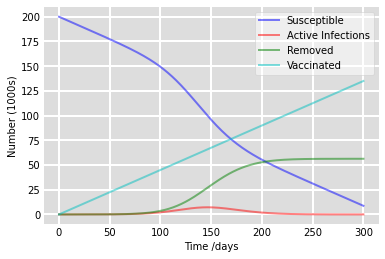

In [5]:
plot(S,I,R)

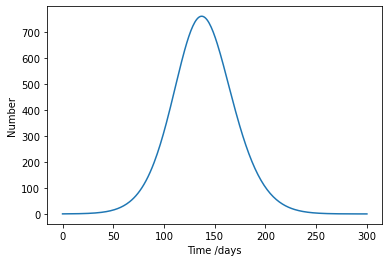

In [6]:
#plot the new cases for each day
plt.plot(t, beta*S*I/N)
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.show()

1.99999
2.0


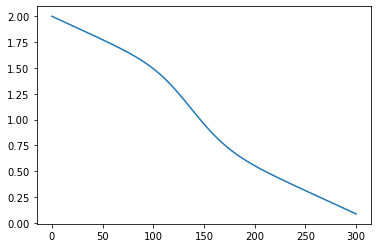

In [7]:
plt.plot(t, Roft)
print(Roft[0])
print(beta/gamma)